In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
## Epsilon Greedy experiement
def plot(targets, cRegret, cReward,trial):
    x = np.linspace(0, 1, 200)
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5))
    for t in targets:
        y = ss.beta.pdf(x, t.a, t.b)
        ax1.plot(x, y, label="(p,a,b,n)=({:.2f},{:d},{:d},{:d})".format(t.p, t.a, t.b, t.n))
        ax1.legend()
    ax1.set_title('probability distribution of respond rate')
    ax2.plot(cRegret)
    ax2.set_title('cumulative regret')
    ax3.plot(cReward)
    ax3.set_title('cumulative reward')    
    
class Target(object):
    def __init__(self,p):
        self.p = p
        self.a = 1
        self.b = 1
        self.n = 0
        
    def trigger(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
        
    def prob(self):
        return self.a/(self.a + self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.n += 1
    
    def reward(self):
        return self.a
    
    def regret(self):
        return self.b
    
def experiment():
    BernEG = [Target(p) for p in target_probabilities] #Creste customer for epsilon greedy 
    n_pulling = [0,0,0]
    cumulative_reward = []
    cumulative_regret = []
    
    for i in range(num_trails):
        best_target = None
        max_prob = -1
        test = np.random.random()
        if (test < epsilon) or (i < 20): #with probability epsilon, we explore more data
            index = np.random.randint(0,len(BernEG))
            best_target = BernEG[index]
        else: 
            for n,target in enumerate(BernEG):
                prob = target.prob()
                if prob > max_prob:
                    maxprob = prob
                    best_target = target
                    index = n
                    
        x = best_target.trigger()
        best_target.update(x)
        cumulative_reward.append(sum([t.reward() for t in BernEG]))
        cumulative_regret.append(sum([t.regret() for t in BernEG]))
                                 
    plot(BernEG, cumulative_regret, cumulative_reward, num_trails)

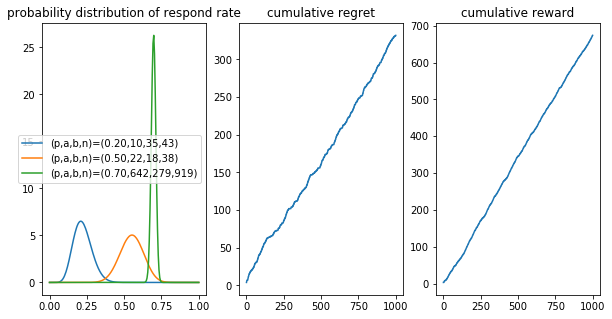

In [3]:
num_trails = 1000
target_probabilities = [0.2, 0.5, 0.7]
epsilon = 0.1
experiment()

In [4]:

def plot_posterior(all_targets, trial):
    x = np.linspace(0, 1, 200)
    names = ['EG','TS']
    linestyles = ['-','-.']
    colors = ['r','b','g']
    for i, targets in enumerate(all_targets):
        for j, t in enumerate(targets):
            y = ss.beta.pdf(x, t.a, t.b)
            plt.plot(x, y, 
                     color = colors[j],
                     linestyle = linestyles[i],
                     label="{:s} real p: {:.2f} ".format(names[i],t.p))
    plt.title("posterior distributions after %s trials" % trial)
    plt.legend()
    plt.show()

def plot_cumR(cRegret, cReward):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.plot(cRegret[0], label = r"Epsilon Greedy")
    ax1.plot(cRegret[1], label = r"Thompson Sampling")
    ax2.plot(cReward[0], label = r"Epsilon Greedy ")
    ax2.plot(cReward[1], label = r"Thompson Sampling")
    ax1.set_title('Cumulative Regret')
    ax1.legend()
    ax2.set_title('Cumulative Reward')
    ax2.legend()
    fig.show()
    
def experiment1():
    sample_points = [50, 200, 500, 1000, 2000]
    #Epsilon Greedy
    BernEG = [Target(p) for p in target_probabilities] #Creste customer for epsilon greedy 
    
    #Thompson Sampling
    BernTS = [Target(p) for p in target_probabilities]
    
    BernAll = [BernEG, BernTS]
    cumulative_reward = [], []
    cumulative_regret = [], []
    
    for i in range(num_trails):
        best_target = [None, None]
        max_prob = [-1, -1]
        index = [0, 0]
        
        #Epsilon Greedy
        test = np.random.random()
        if (test < epsilon) and (i < 20): #with probability epsilon, we explore more data
            index[0] = np.random.randint(0,len(BernEG))
            best_target[0] = BernEG[index[0]]
        else: 
            for n, target in enumerate(BernEG):
                prob = target.prob()
                if prob > max_prob[0]:
                    max_prob[0] = prob
                    best_target[0] = target
                    index[0] = n
        
        #Thompson Sampling
        for n, target in enumerate(BernTS):
            sample = target.sample()
            if sample > max_prob[1]:
                max_prob[1] = sample
                best_target[1] = target
                index[1] = n
                    
        for k in [0,1]:
            x = best_target[k].trigger()
            best_target[k].n += 1
            best_target[k].update(x)
            cumulative_reward[k].append(sum([t.reward() for t in BernAll[k]]))
            cumulative_regret[k].append(sum([t.regret() for t in BernAll[k]]))
        
        if i in sample_points:
            plot_posterior(BernAll,i)
            
    plot_posterior(BernAll,i)
    plot_cumR(cumulative_regret,cumulative_reward)

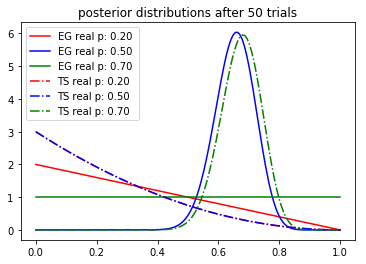

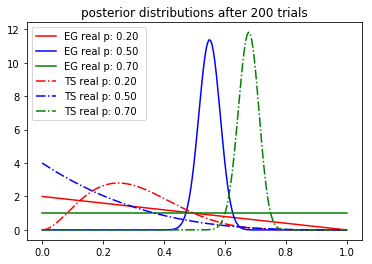

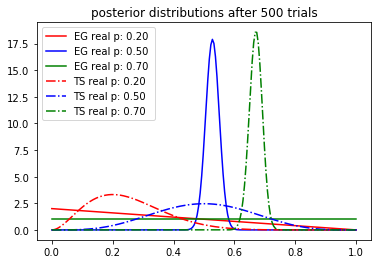

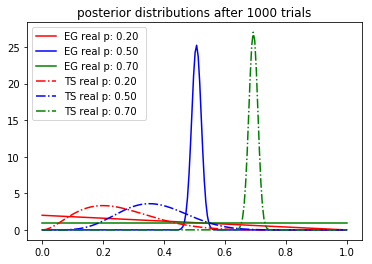

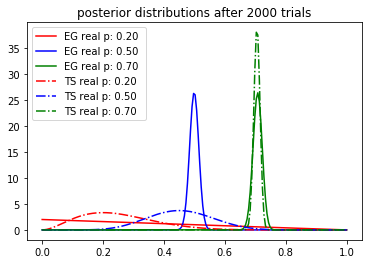

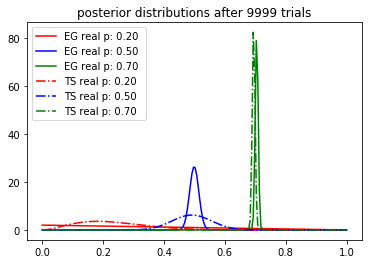

/Users/yhhsu/Anaconda/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


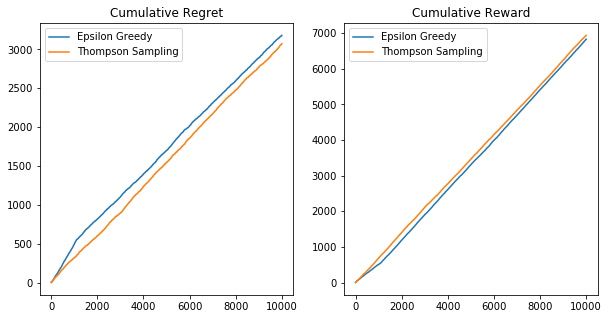

In [5]:
num_trails = 10000
target_probabilities = [0.2, 0.5, 0.7]
epsilon = 0.1
experiment1()

How to show that Cumulative regret converge ??